In [ ]:
from google.colab import auth
auth.authenticate_user()

# Make Directory
!mkdir PAN

# Mount GCS bucket
!gcloud config set project dsgt-clef-2024
#!pip install gcsfuse
!gsutil ls


!gsutil -m cp -r gs://dsgt-clef-pan-2024/* /content/PAN/

#check
!ls PAN

Updated property [core/project].
gs://dsgt-clef-2024/
gs://dsgt-clef-2024-tfstate/
gs://dsgt-clef-bioasq-2024/
gs://dsgt-clef-birdclef-2024/
gs://dsgt-clef-erisk-2024/
gs://dsgt-clef-fungiclef-2024/
gs://dsgt-clef-geolifeclef-2024/
gs://dsgt-clef-idpp-2024/
gs://dsgt-clef-pan-2024/
gs://dsgt-clef-plantclef-2024/
gs://dsgt-clef-snakeclef-2024/
gs://dsgt-clef-touche-2024/
Copying gs://dsgt-clef-pan-2024/PAN Data/HF_artem9k_ai_text_detection_pile/train-00000-of-00007-bc5952582e004d67.parquet...
Copying gs://dsgt-clef-pan-2024/PAN Data/GPT-wiki-intro.csv...
Copying gs://dsgt-clef-pan-2024/PAN Data/HF_NabeelShar_ai_and_human_text.csv...
Copying gs://dsgt-clef-pan-2024/PAN Data/HF_artem9k_ai_text_detection_pile/train-00001-of-00007-71c80017bc45f30d.parquet...
Copying gs://dsgt-clef-pan-2024/PAN Data/HF_artem9k_ai_text_detection_pile/train-00002-of-00007-ee2d43f396e78fbc.parquet...
==> NOTE: You are downloading one or more large file(s), which would
run significantly faster if you enabled sli

In [ ]:
from google.cloud import storage


def add_blob_owner(bucket_name, blob_name, user_email):
    """Adds a user as an owner on the given blob."""
    # bucket_name = "your-bucket-name"
    # blob_name = "your-object-name"
    # user_email = "name@example.com"

    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    #blob = bucket.blob(blob_name)
    bucket.acl.user(user_email).grant_owner()
    bucket.acl.save()
    # Reload fetches the current ACL from Cloud Storage.
    #blob.acl.reload()

    # You can also use `group`, `domain`, `all_authenticated` and `all` to
    # grant access to different types of entities. You can also use
    # `grant_read` or `grant_write` to grant different roles.
    #blob.acl.user(user_email).grant_owner()
    #blob.acl.save()

    print(
        "Added user {} as an owner on blob {} in bucket {}.".format(
            user_email, blob_name, bucket_name
        )
    )

add_blob_owner('dsgt-clef-pan-2024','PAN Data','abin1995nman@gmail.com')

Added user abin1995nman@gmail.com as an owner on blob PAN Data in bucket dsgt-clef-pan-2024.


In [ ]:
from google.cloud import storage

def add_user_to_bucket(bucket_name, user_email):
    # Initialize a client
    client = storage.Client()

    # Get the bucket
    bucket = client.get_bucket(bucket_name)

    # Define the ACL entity for the user
    user_entity = storage.acl.domain(user_email)

    # Add the user to the bucket ACL with the desired permissions
    bucket.acl.user(user_entity).grant_read()  # You can use other methods like grant_write(), grant_read_acl(), etc.

    print(f"User {user_email} added to the ACL of bucket {bucket_name}.")

# Replace 'your-bucket-name' and 'user@example.com' with your actual bucket name and user email
add_user_to_bucket('dsgt-clef-pan-2024', 'WessellJack00@gmail.com')

AttributeError: module 'google.cloud.storage.acl' has no attribute 'domain'

Combine DataSets

In [ ]:
import pandas as pd
GPT = pd.read_csv('/content/PAN/PAN Data/GPT-wiki-intro.csv')

In [ ]:
Nabeel = pd.read_csv('/content/PAN/PAN Data/HF_NabeelShar_ai_and_human_text.csv')

In [ ]:
# Read the Parquet file into a pandas DataFrame
!pip install fastparquet
import fastparquet
df = pd.read_parquet('/content/PAN/PAN Data/HF_artem9k_ai_text_detection_pile/train-00000-of-00007-bc5952582e004d67.parquet', engine='fastparquet')

In [ ]:


import os
files = os.listdir('/content/PAN/PAN Data/HF_artem9k_ai_text_detection_pile/')
dtf = pd.DataFrame()
for file in files:
  df = pd.read_parquet('/content/PAN/PAN Data/HF_artem9k_ai_text_detection_pile/' + file, engine='fastparquet')
  dtf = pd.concat([dtf, df],axis = 0)
  print(file)

train-00002-of-00007-ee2d43f396e78fbc.parquet
train-00005-of-00007-3dce5e05ddbad789.parquet
train-00003-of-00007-529931154b42b51d.parquet
train-00000-of-00007-bc5952582e004d67.parquet
train-00001-of-00007-71c80017bc45f30d.parquet
train-00006-of-00007-3d8a471ba0cf1c8d.parquet
train-00004-of-00007-b269dc49374a2c0b.parquet


In [ ]:
dtf['Type'] = 'HF_artem9k'
dtf[['source','text','Type']]


,source,text,Type
0,human,Total misconception . In 99 % of places in dev...,HF_artem9k
1,human,"Obviously it depends where you live , but in m...",HF_artem9k
2,human,It 's a misconception . In most of the develop...,HF_artem9k
3,human,No . Electrical musical instruments work by ha...,HF_artem9k
4,human,"When you take a string , stretch it taut , and...",HF_artem9k
...,...,...,...
198927,human,"Janet ’ s such a bitch, ” I agreed, nodding my...",HF_artem9k
198928,human,"“ Any last words, hero? ” \n \n The Iron Fist ...",HF_artem9k
198929,human,"ut, and his heart dropped. \n \n The glint of ...",HF_artem9k
198930,human,"s impact. \n \n “ Okay, that ’ s Perjury done....",HF_artem9k


In [ ]:
GPTcondensed = pd.DataFrame()

GPTcondensed['text'] = GPT['generated_intro'] + GPT['generated_text']
GPTcondensed['source'] = 'ai'

Humancondesned = pd.DataFrame()

Humancondesned['text'] = GPT['wiki_intro']
Humancondesned['source'] = 'human'
GPTcondensed = pd.concat([GPTcondensed, Humancondesned], axis = 0)
GPTcondensed['Type'] = 'GPT'
GPTcondensed[['source','text','Type']]


,source,text,Type
0,ai,Sexhow railway station was a railway station l...,GPT
1,ai,"In Finnish folklore, all places and things, an...",GPT
2,ai,"In mathematics, specifically differential calc...",GPT
3,ai,is a Japanese shōjo manga series written and i...,GPT
4,ai,"Robert Milner ""Rob"" Bradley, Jr. (born August ...",GPT
...,...,...,...
149995,human,Randy Borum is a Professor and Coordinator of ...,GPT
149996,human,"Sa'och (, also, ""Sauch"") is an endangered, nea...",GPT
149997,human,Philip C. Hanawalt (born 1931) is an American ...,GPT
149998,human,Vossius Gymnasium is a public gymnasium in Ams...,GPT


In [ ]:

Nabeel['source'] = Nabeel['generated'].map({0:'human', 1:'ai'})
Nabeel['Type'] = 'HF Nabeel'
Nabeel[['source','text','Type']]

,source,text,Type
0,human,Cars. Cars have been around since they became ...,HF Nabeel
1,human,Transportation is a large necessity in most co...,HF Nabeel
2,human,"""America's love affair with it's vehicles seem...",HF Nabeel
3,human,How often do you ride in a car? Do you drive a...,HF Nabeel
4,human,Cars are a wonderful thing. They are perhaps o...,HF Nabeel
...,...,...,...
46241,ai,"Dear Senator,\n\nI am writing to you today to ...",HF Nabeel
46242,ai,"Dear Senator,\n\nI am writing to you today to ...",HF Nabeel
46243,ai,"Dear Senator,\n\nI am writing to you today to ...",HF Nabeel
46244,ai,"Dear Senator,\n\nI am writing to you today to ...",HF Nabeel


In [ ]:
dfz = pd.read_csv('/content/PAN/PAN Data/HF_dmitva_human_ai_generated_text.csv')


In [ ]:
import numpy as np
dfz = pd.DataFrame(pd.concat([dfz['human_text'],dfz['ai_text']],axis = 0),columns = ['text'])
dfz['source'] = np.hstack((['human']*500000,['ai']*500000))

In [ ]:
dfz['Type'] = 'HF_dmitva'
dfz[['source','text','Type']]

,source,text,Type
0,human,If they get classes at home they don't learnin...,HF_dmitva
1,human,"Students would be happy of having a day off, a...",HF_dmitva
2,human,"If students get involve in many of them, then ...",HF_dmitva
3,human,Emerson gave us a great point with this statem...,HF_dmitva
4,human,I disagree and I believe that other humans mak...,HF_dmitva
...,...,...,...
499995,ai,"For example, national parks in the United Stat...",HF_dmitva
499996,ai,"But if history has taught us anything, it's th...",HF_dmitva
499997,ai,"However, it is important to remember that tech...",HF_dmitva
499998,ai,She shared that she felt pressured and overwhe...,HF_dmitva


In [ ]:
Final = pd.concat([dfz[['source','text','Type']],
           Nabeel[['source','text','Type']],
           GPTcondensed[['source','text','Type']],
           dtf[['source','text','Type']]],axis = 0)

del dfz
del Nabeel
del GPTcondensed
del dtf
del df
del GPT
del Humancondesned

# **EDA**

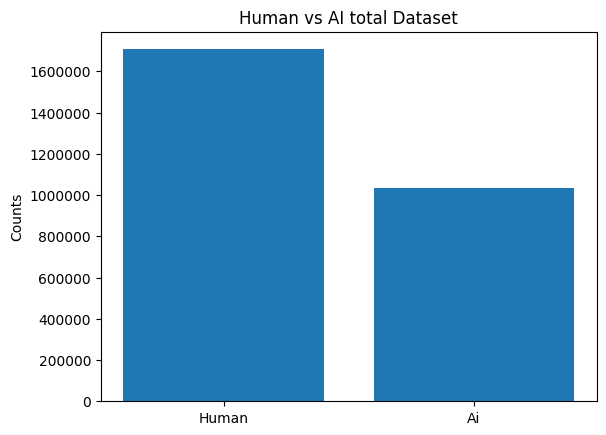

In [ ]:
import matplotlib.pyplot as plt

plt.bar(['Human','Ai'],Final['source'].value_counts())
plt.ticklabel_format(style='plain', axis='y')
plt.title('Human vs AI total Dataset')
plt.ylabel('Counts')
plt.show()

In [ ]:
def count_words(text):
    words = text.split()
    return len(words)
Final['wordcount'] = Final['text'].apply(count_words)

In [ ]:
Final = Final.loc[Final['wordcount'] <= 500].reset_index(drop = True)
Final['wordcount'].describe()

count    2.220061e+06
mean     2.239079e+02
std      1.022346e+02
min      0.000000e+00
25%      1.660000e+02
50%      1.940000e+02
75%      2.790000e+02
max      5.000000e+02
Name: wordcount, dtype: float64

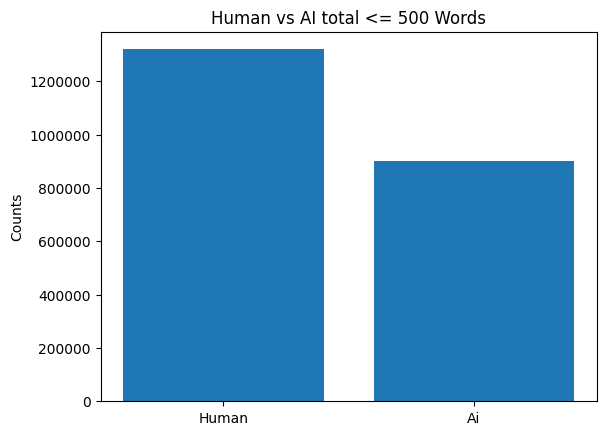

In [ ]:
plt.bar(['Human','Ai'],Final['source'].value_counts())
plt.ticklabel_format(style='plain', axis='y')
plt.title('Human vs AI total <= 500 Words')
plt.ylabel('Counts')
plt.show()

Text(0.5, 1.0, 'Human vs AI total <= 500 Words Word Count Distro')

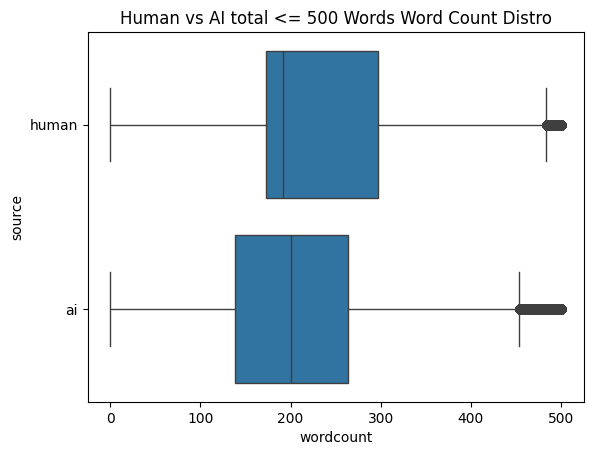

In [ ]:
import seaborn as sns
sns.boxplot(x = Final['wordcount'],y = Final['source'])
plt.title('Human vs AI total <= 500 Words Word Count Distro')


In [ ]:
def unique_words(text):
    words = text.split()
    return len(set(words))
Final['unique_words'] = Final['text'].apply(unique_words)

Text(0.5, 1.0, 'Human vs AI total <= 500 Words Unqiue Word Count Distro')

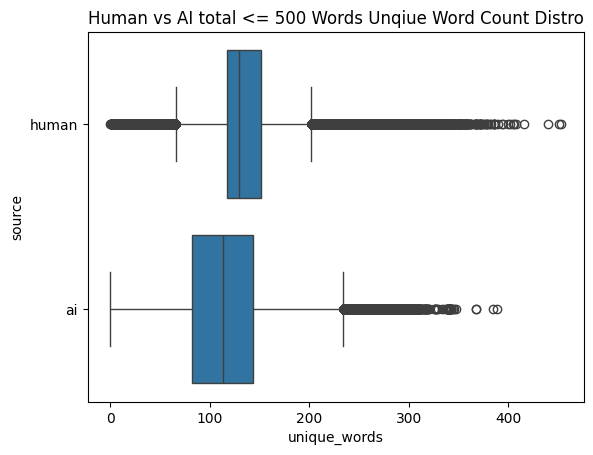

In [ ]:
sns.boxplot(x = Final['unique_words'],y = Final['source'])
plt.title('Human vs AI total <= 500 Words Unqiue Word Count Distro')

In [ ]:
stop_words = [
    'a', 'an', 'and', 'are', 'as', 'at', 'be', 'by', 'for', 'from', 'has', 'he',
    'in', 'is', 'it', 'its', 'of', 'on', 'that', 'the', 'to', 'was', 'were', 'with',
    'I', 'you', 'your', 'they', 'their', 'we', 'our', 'us', 'he', 'his', 'him', 'she', 'her'
    'have', 'had'
]


In [ ]:
Final['LengthNoStopWords'] = Final['text'].apply(lambda x: len([x for x in x.split() if x not in stop_words]))

Text(0.5, 1.0, 'Human vs AI total <= 500 Words Word Length W/o Stop Words Distro')

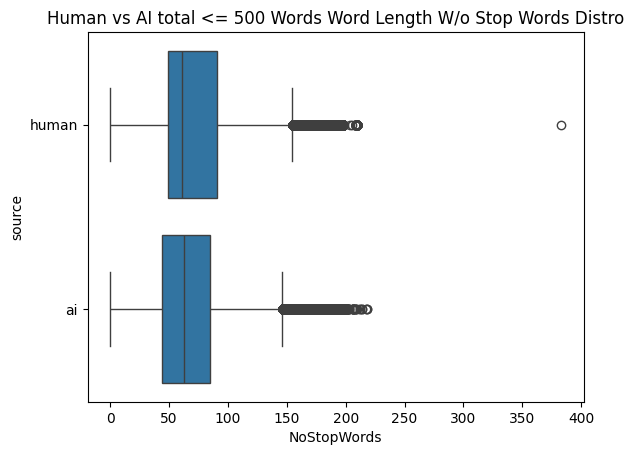

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
Final['NoStopWords'] = Final['wordcount'] - Final['LengthNoStopWords']
sns.boxplot(x = Final['NoStopWords'],y = Final['source'])
plt.title('Human vs AI total <= 500 Words Stop Words Distro')

Baseline Model

In [ ]:
Humantexts = Final.loc[Final['source'] == 'human'].sample(n=10000,random_state = 42).reset_index(drop = True)
Aitexts = Final.loc[Final['source'] == 'ai'].sample(n=10000,random_state = 42).reset_index(drop = True)
#del Final

In [ ]:
Humantexts

,source,text,Type,wordcount
0,human,If they get classes at home they don't learnin...,HF_dmitva,436
1,human,"If students get involve in many of them, then ...",HF_dmitva,446
2,human,Emerson gave us a great point with this statem...,HF_dmitva,363
3,human,I disagree and I believe that other humans mak...,HF_dmitva,190
4,human,"Online classes, i think that if students reall...",HF_dmitva,211
...,...,...,...,...
9995,human,Some people think people should make their on ...,HF_dmitva,265
9996,human,So if this is happenning is when schools shouo...,HF_dmitva,315
9997,human,. Should you agree to letting the school bo...,HF_dmitva,466
9998,human,I believe everyone can achieve there by just f...,HF_dmitva,494


from matplotlib import pyplot as plt
Humantexts['wordcount'].plot(kind='hist', bins=20, title='wordcount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Humantexts['wordcount'].plot(kind='line', figsize=(8, 4), title='wordcount')
plt.gca().spines[['top', 'right']].set_visible(False)

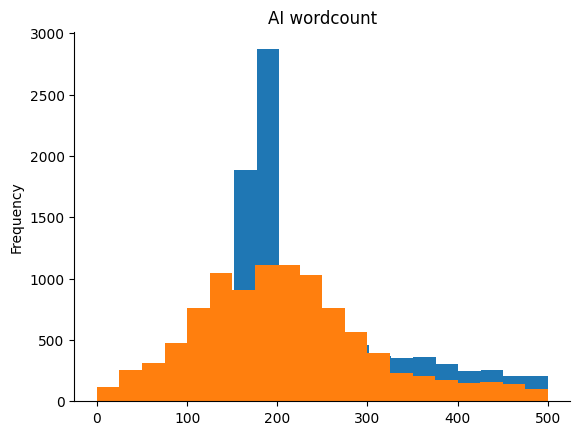

In [ ]:
from matplotlib import pyplot as plt
Humantexts['wordcount'].plot(kind='hist', bins=20, title='Human wordcount')
plt.gca().spines[['top', 'right',]].set_visible(False)

Aitexts['wordcount'].plot(kind='hist', bins=20, title='AI wordcount')
plt.gca().spines[['top', 'right',]].set_visible(False)


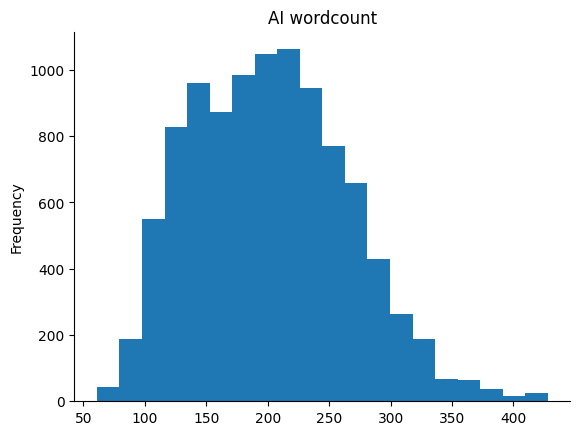

7.033432627547809

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

combo = pd.concat([Humantexts,Aitexts],axis = 0)
combo['source'] = combo['source'].map({'human':0,'ai':1})
combo[['source','text']]
combo['text'] = combo['text'].str.replace('\n','')
y = combo['source']
X = combo['text']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000,stop_words = 'english')
tfidf_matrix_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the new document using the already fitted vectorizer
tfidf_matrix_new = tfidf_vectorizer.transform(X_test)

# Convert the TF-IDF matrices to dense arrays for better readability
dense_array_train = tfidf_matrix_train.toarray()
dense_array_new = tfidf_matrix_new.toarray()

del tfidf_matrix_train
del tfidf_matrix_new

from sklearn.decomposition import PCA

import numpy as np



# Create and fit PCA on the training data
pca = PCA(n_components=100)
X_train_reduced = pca.fit_transform(dense_array_train)


# Use transform on the new data using the same PCA model
X_new_reduced = pca.transform(dense_array_new)

# Print the shapes of the reduced training and new data
print("Reduced Training Data Shape:", X_train_reduced.shape)
print("Reduced New Data Shape:", X_new_reduced.shape)


import xgboost as xgb
from sklearn.metrics import accuracy_score

clf = xgb.XGBClassifier()

clf.fit(X_train_reduced, y_train)

y_pred = clf.predict(X_new_reduced)

print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.0f}%')

Reduced Training Data Shape: (16000, 100)
Reduced New Data Shape: (4000, 100)
Accuracy: 87%


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Load or prepare your text data (replace this with your data)
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data
labels = newsgroups.target

# Split the data into training and testing sets
X_trains, X_tests, y_trains, y_tests = train_test_split(documents, labels, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_trains)
X_test_tfidf = tfidf_vectorizer.transform(X_tests)

# PCA for Dimensionality Reduction
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())

# XGBoost Classifier
clf = xgb.XGBClassifier()
clf.fit(X_train_pca, y_trains)

# Predictions
y_preds = clf.predict(X_test_pca)

# Evaluate Accuracy
accuracy = accuracy_score(y_tests, y_preds)
print("Accuracy:", accuracy)


Accuracy: 0.5997347480106101
